## Terrorism Analysis Sahel Explainer Notebook

1. **Motivation**
* **What is the dataset?**
We are looking at the Global Terrorism Database, which contains information on over 200,000 terrorism incidents between 1970 and 2020.

* **Why did you choose this particular dataset?**
Terrorism data could help reveal the story of insurgency in this area of Africa. As opposed to other terrorism databases, **need toms to talk about that research paper on databases here**

* **What was your goal for the end user's experience?**
To provide an overview of the situation in the Sahel region of Africa. Provide information to someone who does not know much about what is going on in this area. Have it be an interactive and engaging story.

2. **Basic stats. Let's understand the dataset better**
* **Choices in data cleaning and preprocessing**

First, we decided to convert the dataset into a Comma-Separated Value file from the original Excel file. This was done since in the case of having to recompile the notebook we would be able to quickly reload the entire dataset in the matter of a few seconds rather than in almost 3 minutes.

Importing the data:

In [64]:
import pandas as pd

# Reading csv from just outside repo folder into pandas dataframe
TerrorData = pd.read_csv('../globalterrorism.csv')
TerrorData.head()

C:\Users\Bruger\AppData\Local\Temp\ipykernel_28612\1898083150.py:4: DtypeWarning:

Columns (4,31,33,54,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Next, we made a date column that takes the iyear, imonth and iday columns and converts them into a single pandas formatted date, making it easier to work with time frames later on.

Adding date column:

In [83]:
# Concatenating 'iyear', 'imonth', and 'iday' columns
TerrorData['DateStrings'] = TerrorData['iyear'].astype(str) + \
                            (TerrorData['imonth']).astype(str).str.zfill(2) + \
                            (TerrorData['iday']).astype(str).str.zfill(2)

# Convert 'DateStrings' to datetime objects
TerrorData['Date'] = pd.to_datetime(TerrorData['DateStrings'], format='mixed', errors='coerce')

# Displaying the date column
print(TerrorData['Date'])

0        1970-07-02
1               NaT
2               NaT
3               NaT
4               NaT
            ...    
209701   2020-12-31
209702   2020-12-31
209703   2020-12-31
209704   2020-12-31
209705   2020-12-31
Name: Date, Length: 209706, dtype: datetime64[ns]


Lastly, we created a filter that selects only the terrorism incidents in Burkina Faso, Mali and Niger; the countries in the central Sahel region.

In [76]:
# Filtering for just the countries of the Sahel region:
Sahel = TerrorData[TerrorData['country_txt'].isin(['Mali', 'Burkina Faso', 'Niger'])]

* **Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.**


Looking at how many incidents there are in this region:

In [81]:
print("Number of incidents: {}".format(len(Sahel)))

Number of incidents: 1661


Seeing how the number of incidents changes year by year:

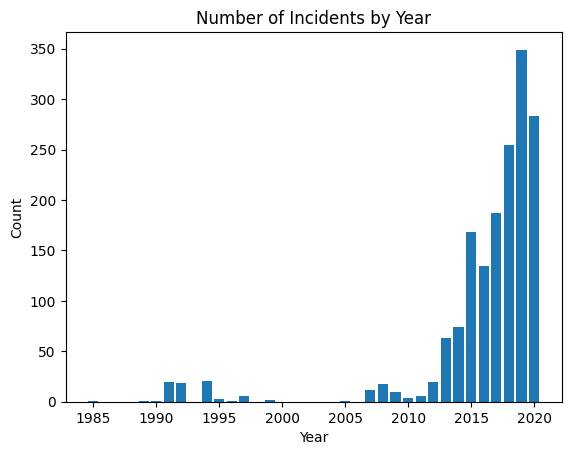

In [107]:
import matplotlib.pyplot as plt

# Grouping by year
yearsCount = Sahel.groupby(Sahel['Date'].dt.year).size()

# Making bar plot
plt.bar(yearsCount.index, yearsCount.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Incidents by Year')
plt.show()

How the number of deaths change year by year:

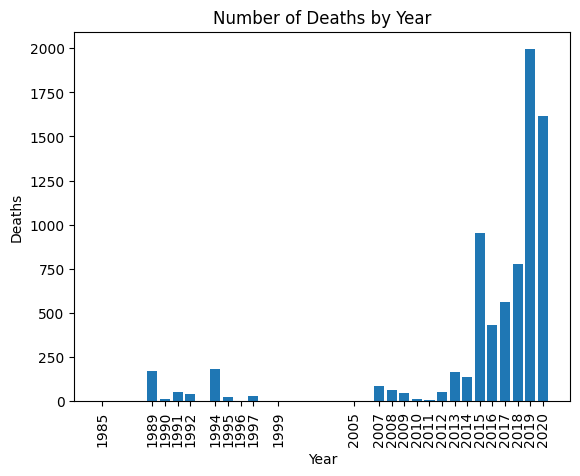

In [103]:
import matplotlib.pyplot as plt

# Grouping by year and summing 'nkill'
nkill_by_year = Sahel.groupby(Sahel['Date'].dt.year)['nkill'].sum()

# Making bar plot
plt.bar(nkill_by_year.index, nkill_by_year.values)
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Number of Deaths by Year')
plt.xticks(rotation=90, ticks=nkill_by_year.index)
plt.show()


Finding the organisations with the most terror attacks for this area:

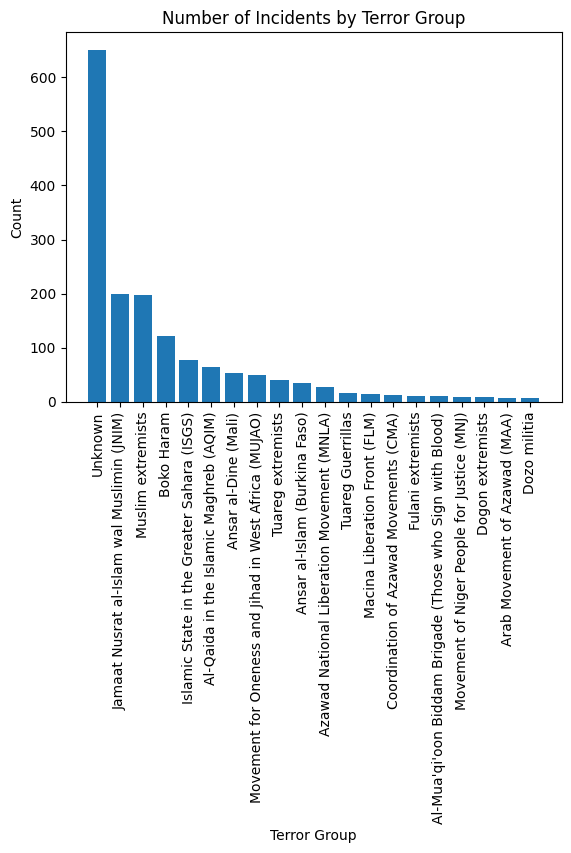

In [98]:
# Grouping by organisation name and counting
gnameCount = Sahel.groupby('gname').size().sort_values(ascending=False).head(20)

# Making bar plot
plt.bar(gnameCount.index, gnameCount.values)
plt.xlabel('Terror Group')
plt.ylabel('Count')
plt.title('Number of Incidents by Terror Group')
plt.xticks(rotation=90)
plt.show()

Finding the most common types of attack:

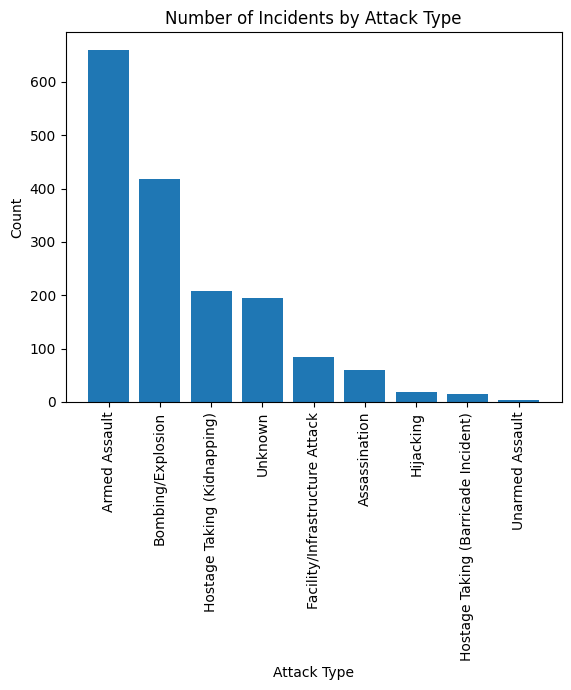

In [97]:
# Grouping by attacktype and counting
attackCount = Sahel.groupby('attacktype1_txt').size().sort_values(ascending=False)

# Making bar plot
plt.bar(attackCount.index, attackCount.values)
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.title('Number of Incidents by Attack Type')
plt.xticks(rotation=90)
plt.show()

Finding the most common types of target:

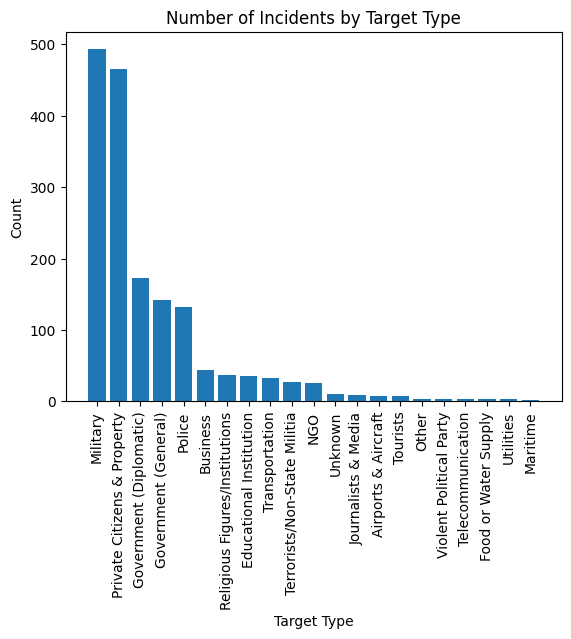

In [99]:
# Grouping by targettype and counting
targetCount = Sahel.groupby('targtype1_txt').size().sort_values(ascending=False)

# Making bar plot
plt.bar(targetCount.index, targetCount.values)
plt.xlabel('Target Type')
plt.ylabel('Count')
plt.title('Number of Incidents by Target Type')
plt.xticks(rotation=90)
plt.show()

Finding the most common weapons used:

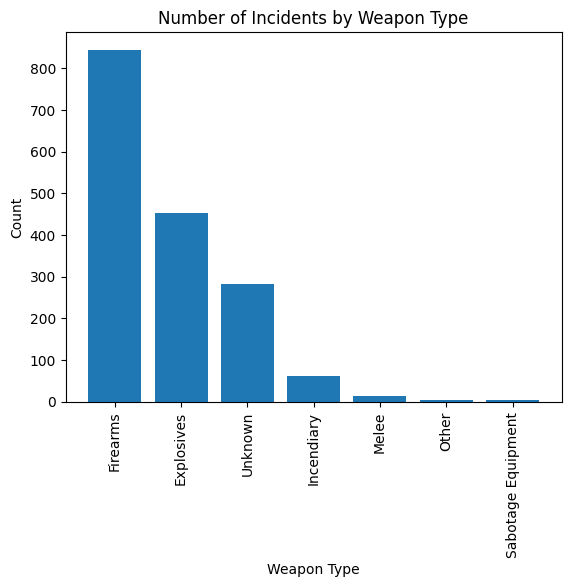

In [100]:
# Grouping by targettype and counting
weaponCount = Sahel.groupby('weaptype1_txt').size().sort_values(ascending=False)

# Making bar plot
plt.bar(weaponCount.index, weaponCount.values)
plt.xlabel('Weapon Type')
plt.ylabel('Count')
plt.title('Number of Incidents by Weapon Type')
plt.xticks(rotation=90)
plt.show()

3. **Data Analysis**
* **Describe your data analysis and explain what you've learned about the dataset.**
* **If relevant, talk about your machine-learning.**

**Scatter Map Plot**

Creating a color map for the top 15 groups:

In [138]:
from bokeh.palettes import Category20

# Top 14 groups which had the most counts of terrorism
Groups = Sahel.groupby(Sahel['gname']).size().sort_values(ascending=False).head(14).index.values

# Make new column in Sahel which is either the gname if it is in the top 14 groups or 'other'
Sahel.loc[:, 'GroupID'] = Sahel['gname'].apply(lambda x: x if x in Groups else 'Other')

# Making replacements to shorten GroupID for map legend
Sahel['GroupID'] = Sahel['GroupID'].replace({
                                                'Jamaat Nusrat al-Islam wal Muslimin (JNIM)': 'JNIM',
                                                'Islamic State in the Greater Sahara (ISGS)': 'ISGS',
                                                'Al-Qaida in the Islamic Maghreb (AQIM)': 'AQIM',
                                                'Azawad National Liberation Movement (MNLA)': 'MNLA',
                                                'Movement for Oneness and Jihad in West Africa (MUJAO)': 'MUJAO',
                                                'Coordination of Azawad Movements (CMA)': 'CMA',
                                                'Macina Liberation Front (FLM)': 'FLM'
                                            })


# Defining the palette
paletteHex = Category20[20]
palette = [tuple(int(hex_color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)) for hex_color in paletteHex]

# Create sorted list of groupid for color mapping
ListGroupID = Sahel.groupby(Sahel['GroupID']).size().sort_values(ascending=False).index.values

# Create color mapping for the groups from the palette
color_mapping_groups = {group: palette[i] for i, group in enumerate(ListGroupID)}

# Create column for the color
Sahel.loc[:, 'colorGroups'] = Sahel['GroupID'].map(color_mapping_groups)


C:\Users\Bruger\AppData\Local\Temp\ipykernel_28612\1770346523.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Creating a LocationData table for a scatter map plot:

In [139]:
print(ListGroupID)

# Convert the 'Date' column to string
Sahel.loc[:, 'DateStr'] = Sahel['Date'].astype(str)

# Create new location data table
LocationData = Sahel[['latitude', 'longitude', 'gname', 'DateStr', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'nkill', 'GroupID']]

# Calculate size based on 'nkill' column
LocationData.loc[:, 'Size'] = ((LocationData['nkill'] + 14) / 2).fillna(7)

# Reorder based on GroupID occurence for map legend
# Count occurrences of GroupID
group_counts = LocationData['GroupID'].value_counts().reset_index()
group_counts.columns = ['GroupID', 'GroupID_Count']

# Merge counts back to LocationData and sort by occurrence count
LocationData = LocationData.merge(group_counts, on='GroupID', how='left')
LocationData = LocationData.sort_values(by='GroupID_Count', ascending=False).drop(columns='GroupID_Count')

LocationData.head()

['Unknown' 'JNIM' 'Muslim extremists' 'Boko Haram' 'Other' 'ISGS' 'AQIM'
 'Ansar al-Dine (Mali)' 'MUJAO' 'Tuareg extremists'
 'Ansar al-Islam (Burkina Faso)' 'MNLA' 'Tuareg Guerrillas' 'FLM' 'CMA']


C:\Users\Bruger\AppData\Local\Temp\ipykernel_28612\2403612111.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,latitude,longitude,gname,DateStr,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,GroupID,Size
0,12.347598,-1.538065,Unknown,NaT,Assassination,Government (General),Firearms,1.0,Unknown,7.5
875,11.181111,0.830000,Unknown,2018-06-17,Unknown,Government (General),Unknown,1.0,Unknown,7.5
934,9.883333,-2.916667,Unknown,2018-08-21,Armed Assault,Government (General),Firearms,1.0,Unknown,7.5
939,11.523836,0.753281,Unknown,2018-08-29,Armed Assault,Business,Firearms,NaN,Unknown,7.0
940,12.651280,0.491534,Unknown,2018-09-03,Armed Assault,Police,Firearms,0.0,Unknown,7.0


Plotting plotly scatter mapbox of the terror incidents in the region:

In [140]:
import plotly.express as px
import plotly

# Assuming color_mapping_groups is your dictionary mapping group names to RGB tuples
# Convert RGB tuples to hexadecimal color codes for Plotly
color_discrete_map = {group: 'rgb' + str(color) for group, color in color_mapping_groups.items()}

# Set mapbox access token
px.set_mapbox_access_token("pk.eyJ1IjoibWF4c3RhbHplciIsImEiOiJjbHYyZ25hbWowZzJzMmtwMHBkYjV0NGRlIn0.C5S66swLHAhM_yKFtjXpdw")

# Create the scatter mapbox plot with color_discrete_map parameter
fig = px.scatter_mapbox(LocationData,
                        lat="latitude",
                        lon="longitude",
                        color="GroupID", # Ensure this uses the column with group names
                        color_discrete_map=color_discrete_map, # Use the color mapping
                        size="Size",
                        opacity=1,
                        hover_name=None,
                        hover_data=None,
                        mapbox_style="satellite-streets",
                        custom_data=["gname", "DateStr", "attacktype1_txt", "targtype1_txt", "weaptype1_txt", "nkill", "GroupID"], # Include "gname" in custom_data
                        zoom=1)

# Update hover template to display custom data without GroupID color mapping
fig.update_traces(hovertemplate="<br>".join([
    "Group: %{customdata[0]}", # "gname" is the first element in customdata
    "Date: %{customdata[1]}",
    "Attack Type: %{customdata[2]}",
    "Target Type: %{customdata[3]}",
    "Weapon Type: %{customdata[4]}",
    "Deaths: %{customdata[5]}",
])+"<extra></extra>")

# Sort the legend
fig.update_layout(legend=dict(
    title="Group",
    title_font=dict(size=15),
    itemsizing="constant"
))

# Show the plot
fig.show()
plotly.offline.plot(fig, filename='MapPlot2.html')


'MapPlot2.html'

**What can we learn from this visualisation?**
* Terror incidents are generally concentrated around the border region between Mali and Burkina Faso. Some groups are a lot more concentrated to a single region than others e.g. Ansar al-Islam (Burkina Faso). Boko Haram being very concentrated around the Lake Chad region.

4. Genre. Which genre of data story did you use?
* **Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?**

Visual structuring &rarr; Consistent Visual Platform

Highlighting &rarr; Feature distinction: In the map scatter plot, clicking on an organisation name in the legend will remove it from the plot while double clicking will highlight only that group. Makes it easy to see where one group was concentrated or to compare only a number of groups which would be harder to see when all the groups are shown in the map.



* **Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?**
* Interactivity &rarr; Hover Highlighting / Details: in the map hovering over a point reveals the information for that incident (group name, date, deaths and attack/target/weapon type). Makes it easy to investigate further from the map and figure out what kind of event happened at what time.
* Interactivity &rarr; Filtering: Able to filter out different terror groups in the map plot as discussed in feature distinction on visual narrative part.
* Interactivity &rarr; Explicit Instruction: Below the map plot it is explained how to filter out the data by double clicking on the legend and to hover for more information on an incident.
* Messaging &rarr; Captions: Below each plot we have a caption that describes what is going on in the figure. Helps to later in the article be able to refer to specific figures and also just gives an overview of what the figure is about and tells the user how to use any interactive features in it.
* Messaging &rarr; Accompanying Article: The article is what backs up all of the visualizations of the exploration. Gives the user the necessary background and information to understand the figures.


5. Visualizations.
* **Explain the visualizations you've chosen.**
**Why are they right for the story you want to tell?**
1. Map Scatter Plot: We plot the geo data of each of the incidents on a satellite map, coloring by affiliated terror organisation and sizing the points by the number of deaths. The hover tooltip provides more information on each incident. By double clicking on the legend we can highlight a single terror organisation. This visualization shows easily where the different groups are most active and which were the most deadly events thus providing a good overview of the situation.



6. Discussion. Think critically about your creation
* **What went well?**
Doing a lot of literature review on the conflicts and political situation in the region and thereby being able to link our exploration to events.

* **What is still missing? What could be improved?, Why?**
Limited database when isolating to this region. The analysis could be improved by perhaps comparing this region to others or by looking at other databases and seeing if there is any correlation. Learning more about the complex political situation here could have given a better overview.

7. Contributions. Who did what?
You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).
It is not OK simply to write "All group members contributed equally".
Make sure that you use references when they're needed and follow academic standards.

Website content:

    Introduction = 
    Terror Groups = 
    Counter Terrorism movements = 


Jupyter notebook content:

    Motivation = 
    Basic Stats = 
    Data Analysis:
        Map plot =
        Time series = 
        
    Genre = 
    Visualisations =
    Discussion = 


    
